In [ ]:
pip install dart-fss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 4.7 MB/s 
     |████████████████████████████████| 61 kB 97 kB/s 
     |████████████████████████████████| 1.9 MB 45.9 MB/s 
     |████████████████████████████████| 41 kB 651 kB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Created wheel for arelle: filename=arelle-2.2-py3-none-any.whl size=2060307 sha256=83fefc61d090713466368b6541bc97ef227a02feab488ac7f3082dcac44dd373
  Stored in directory: /root/.cache/pip/wheels/8c/b2/69/919f97f4f77fd85a26e52df16f1763d68cd18210acc9320ad5
  Created wheel for halo: filename=halo-0.0.31-py3-none-any.whl size=11261 sha256=f38195ab7053d22b7840c0c0209e9bbeb444371418e5f7c97f18e09ea581edd5
  Stored in directory: /root/.cache/pip/wheels/95/ff/20/5d16a0059f20c5e60be2df845201e73af179a5a79a3d566f48
Successfully built arelle halo
  Attempting uninstall: idna
    Found existing installation: idna 2.10
    U

In [1]:
# 사용 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import dart_fss as dart

In [ ]:
# 리스트작성(회사코드)

test = pd.read_excel('/content/test.xlsx')
tt = test.to_dict()
dic_val = tt['리스트'].values()
dic_list = list(dic_val)


In [ ]:
# 기초 데이터 작성 (처음 한번만 실행)

# Open DART API KEY 설정
api_key='434198aef7e44e3ad5fe583a0c955e5e4fc58da3'
dart.set_api_key(api_key=api_key)

# DART 에 공시된 회사 리스트 불러오기
corp_list = dart.get_corp_list()

# 기업 검색
sample = corp_list.find_by_corp_name('오뚜기', exactly=True)[0]

# 2019년부터 연간 연결재무제표 불러오기
fs = sample.extract_fs(bgn_de='20190301', report_tp='quarter')

# 재무제표 검색 결과를 엑셀파일로 저장 ( 기본저장위치: 실행폴더/fsdata )
df7 = fs.show('bs')
df8 = fs.show('cis')

Output()

Output()

Output()

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

In [ ]:
# 기초파일 초기화장치

# 기업 데이터중 필요한 분기 데이터만을 추출하기위한 컬럼 작성 
ddd1 =df7[df7.iloc[:,1].str.contains('제거', na = False)]
ddd3 =df8[df8.iloc[:,1].str.contains('제거', na = False)]
ddd1 = ddd1.drop(ddd1.columns[[0,2,3,5,6]], axis=1).iloc[:,:15]
ddd3 = ddd3.drop(ddd3.columns[[0,2,3,5,6,8,9,14,15,20,21]], axis=1).iloc[:,:15]
# 컬럼명 변경
col_list = list(ddd1.columns)
col_list[0] = 'label'
col_list[1] = 'name'
ddd1.columns = col_list
# 컬럼명 변경2
col_list = list(ddd3.columns)
col_list[0] = 'label'
col_list[1] = 'name'
ddd3.columns = col_list

ddd2 = ddd1


In [ ]:
# 재무상태표 재고자산, 자산총계 작성 & 기준 데이터에 작성 데이터 붙여넣기
# 모든 기업 정보를 한번에 불러오면 시간이 너무 많이 걸려 코랩이 끊기는 상황이 발생하여 따로 여러번 나눠서 데이터를 불러옴

#에러난 데이터 모음
eee = []

for i in dic_list:
  try:
    # Open DART API KEY 설정
    api_key='434198aef7e44e3ad5fe583a0c955e5e4fc58da3'
    dart.set_api_key(api_key=api_key)

    # DART 에 공시된 회사 리스트 불러오기
    corp_list = dart.get_corp_list()

    # 기업 검색
    sample = corp_list.find_by_corp_name(i, exactly=True)[0]

    # 2019년부터 연간 연결재무제표 불러오기
    fs = sample.extract_fs(bgn_de='20190301', report_tp='quarter')

    # 재무제표 검색 결과를 엑셀파일로 저장 ( 기본저장위치: 실행폴더/fsdata )
    dff = fs.show('bs')

    name = i

    df1 = dff[dff.iloc[:,1].str.contains('재고자산', na = False)]
    df2 = dff[dff.iloc[:,1].str.contains('자산총계', na = False)]
    df4 = dff[dff.iloc[:,0].str.contains('재고자산', na = False)]
    df5 = dff[dff.iloc[:,0].str.contains('자산총계', na = False)]

    if(df4.empty & df5.empty):
      df1.iloc[:,4] = [name]
      df2.iloc[:,4] = [name]


      df1 = df1.drop(df1.columns[[0,2,3,5,6]], axis=1)
      df2 = df2.drop(df2.columns[[0,2,3,5,6]], axis=1)
        
      # 컬럼명 변경
      col_list = list(df1.columns)
      col_list[0] = 'label'
      col_list[1] = 'name'
      df1.columns = col_list

      ddd1 = pd.concat([ddd1,df1])
      
      # 컬럼명 변경2
      col_list1 = list(df2.columns)
      col_list1[0] = 'label'
      col_list1[1] = 'name'
      df2.columns = col_list1

      ddd2 = pd.concat([ddd2,df2])
    else:
      df4.iloc[:,1]= [name]
      df5.iloc[:,1]= [name]
      
      
      # 컬럼명 변경
      col_list = list(df4.columns)
      col_list[0] = 'label'
      col_list[1] = 'name'
      df4.columns = col_list

      ddd1 = pd.concat([ddd1,df4])

      # 컬럼명 변경2
      col_list1 = list(df5.columns)
      col_list1[0] = 'label'
      col_list1[1] = 'name'
      df5.columns = col_list1

      ddd2 = pd.concat([ddd2,df5])
      # 실행할 코드
  except:
    print('에러발생')
    eee.append(i)


Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/5 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/6 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/7 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/13 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

/usr/local/lib/python3.7/dist-packages/dart_fss/fs/extract.py:1433: RuntimeWarning: Unable to extract financial statements: {'rcp_no': '20190814000660', 'corp_code': '00153418', 'corp_name': '티케이지태광', 'stock_code': '', 'corp_cls': 'E', 'report_nm': '반기보고서 (2019.06)', 'flr_nm': '티케이지태광', 'rcept_dt': '20190814', 'rm': ''}.
  warnings.warn(warnings_text, RuntimeWarning)


Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

/usr/local/lib/python3.7/dist-packages/dart_fss/fs/extract.py:1433: RuntimeWarning: Unable to extract financial statements: {'rcp_no': '20191114000633', 'corp_code': '00153418', 'corp_name': '티케이지태광', 'stock_code': '', 'corp_cls': 'E', 'report_nm': '분기보고서 (2019.09)', 'flr_nm': '티케이지태광', 'rcept_dt': '20191114', 'rm': ''}.
  warnings.warn(warnings_text, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/dart_fss/fs/extract.py:1433: RuntimeWarning: Unable to extract financial statements: {'rcp_no': '20190515000616', 'corp_code': '00153418', 'corp_name': '티케이지태광', 'stock_code': '', 'corp_cls': 'E', 'report_nm': '분기보고서 (2019.03)', 'flr_nm': '티케이지태광', 'rcept_dt': '20190515', 'rm': ''}.
  warnings.warn(warnings_text, RuntimeWarning)


Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

In [ ]:
# 손익계산서 매출작성 & 기준 데이터에 작성 데이터 붙여넣기



eee1 = []

for i in dic_list:
  try:
    # Open DART API KEY 설정
    api_key='434198aef7e44e3ad5fe583a0c955e5e4fc58da3'
    dart.set_api_key(api_key=api_key)

    # DART 에 공시된 회사 리스트 불러오기
    corp_list = dart.get_corp_list()

    # 기업 검색
    sample = corp_list.find_by_corp_name(i, exactly=True)[0]

    # 2019년부터 연간 연결재무제표 불러오기
    fs = sample.extract_fs(bgn_de='20190301', report_tp='quarter')

    # 재무제표 검색 결과를 엑셀파일로 저장 ( 기본저장위치: 실행폴더/fsdata )
    dff1 = fs.show('cis')

    name = i

    df3 = dff1[dff1.iloc[:,1].str.contains('매출', na = False)]
    df6 = dff1[dff1.iloc[:,0].str.contains('매출', na = False)]
    
    if(df6.empty):
      df3 = df3.iloc[[0]]

      df3.iloc[:,4] = [name]

      # df3 = df3.drop(df3.columns[[0,2,3,5,6,8,9,14,15,20,21]], axis=1)
      #필요하면 위에것 사용
      df3 = df3.drop(df3.columns[[0,2,3,5,6]], axis=1)
          
      # 컬럼명 변경
      col_list = list(df3.columns)
      col_list[0] = 'label'
      col_list[1] = 'name'
      df3.columns = col_list

      ddd3 = pd.concat([ddd3,df3])
    else:
      df6 = df6.iloc[[0]]

      df6.iloc[:,1] = [name]

          
      # 컬럼명 변경
      col_list = list(df6.columns)
      col_list[0] = 'label'
      col_list[1] = 'name'
      df6.columns = col_list

      ddd3 = pd.concat([ddd3,df6])
  except:
    print('에러발생')
    eee1.append(i)


Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/5 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

에러발생


Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/6 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/7 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/13 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

/usr/local/lib/python3.7/dist-packages/dart_fss/fs/extract.py:1433: RuntimeWarning: Unable to extract financial statements: {'rcp_no': '20190814000660', 'corp_code': '00153418', 'corp_name': '티케이지태광', 'stock_code': '', 'corp_cls': 'E', 'report_nm': '반기보고서 (2019.06)', 'flr_nm': '티케이지태광', 'rcept_dt': '20190814', 'rm': ''}.
  warnings.warn(warnings_text, RuntimeWarning)


Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

/usr/local/lib/python3.7/dist-packages/dart_fss/fs/extract.py:1433: RuntimeWarning: Unable to extract financial statements: {'rcp_no': '20191114000633', 'corp_code': '00153418', 'corp_name': '티케이지태광', 'stock_code': '', 'corp_cls': 'E', 'report_nm': '분기보고서 (2019.09)', 'flr_nm': '티케이지태광', 'rcept_dt': '20191114', 'rm': ''}.
  warnings.warn(warnings_text, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/dart_fss/fs/extract.py:1433: RuntimeWarning: Unable to extract financial statements: {'rcp_no': '20190515000616', 'corp_code': '00153418', 'corp_name': '티케이지태광', 'stock_code': '', 'corp_cls': 'E', 'report_nm': '분기보고서 (2019.03)', 'flr_nm': '티케이지태광', 'rcept_dt': '20190515', 'rm': ''}.
  warnings.warn(warnings_text, RuntimeWarning)


Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

Annual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Semiannual reports:   0%|          | 0/4 [00:00<?, ?report/s]

Quarterly reports:   0%|          | 0/7 [00:00<?, ?report/s]

In [ ]:
ddd1

,label,name,"([D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW), class4)","(20220630, (연결재무제표,))","(20220331, (연결재무제표,))","(20211231, (연결재무제표,))","(20210930, (연결재무제표,))","(20210630, (연결재무제표,))","(20210331, (연결재무제표,))","(20201231, (연결재무제표,))",...,"(20180930, (연결재무제표,))","(20180630, (연결재무제표,))","(20180331, (연결재무제표,))","(20170930, (연결재무제표,))","(20170630, (연결재무제표,))","(20170331, (연결재무제표,))","(20160930, (연결재무제표,))","(20160630, (연결재무제표,))","(20160331, (연결재무제표,))","(20141231, (연결재무제표,))"
10,재고자산,오뚜기,None,"383,504,980,297.0","372,291,058,097.0","343,573,901,625.0","337,430,930,774.0","332,747,661,679.0","300,949,894,134.0","259,187,493,787.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,재고자산,엘에스일렉트릭,None,"336,503,886,650.0","295,824,711,313.0","261,477,004,953.0","229,791,462,517.0","204,239,799,701.0","191,543,965,280.0","176,861,493,887.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,재고자산,금호타이어,None,"788,463,729,367.0","676,069,362,253.0","588,030,581,304.0","539,519,341,025.0","486,064,223,746.0","456,492,887,728.0","406,544,087,484.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,재고자산,한국항공우주,None,"1,387,223,024,228.0","1,339,675,553,240.0","1,324,665,604,925.0","1,379,034,505,988.0","1,251,480,293,306.0","1,243,278,317,144.0","1,197,136,963,051.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,재고자산,지역난방공사,None,"25,668,557,030.0","38,274,084,051.0","39,136,995,383.0","33,201,676,265.0","36,857,881,966.0","26,725,848,296.0","38,853,307,573.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,재고자산,대한유화,None,"312,410,595,883.0","313,837,801,604.0","302,995,854,146.0","229,967,949,981.0","213,002,339,401.0","228,440,906,656.0","124,182,705,753.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,재고자산,롯데칠성음료,None,"353,333,820,940.0","338,197,061,279.0","305,372,216,736.0","294,346,553,488.0","298,808,203,810.0","273,951,402,589.0","257,369,471,186.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,재고자산,효성화학,None,"456,668,416,121.0","348,326,602,295.0","401,004,350,414.0","311,771,255,467.0","196,029,415,503.0","160,467,112,487.0","143,161,585,501.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,재고자산,쌍용자동차,None,"167,304,013,275.0","155,338,764,202.0","155,736,354,249.0","153,217,447,527.0","172,060,279,991.0","203,544,385,509.0","192,365,295,049.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,재고자산,CJ프레시웨이,None,"143,929,959,892.0","127,415,373,965.0","115,193,999,115.0","106,212,393,013.0","98,528,313,993.0","99,751,414,980.0","120,207,103,487.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ddd2

,label,name,"([D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW), class4)","(20220630, (연결재무제표,))","(20220331, (연결재무제표,))","(20211231, (연결재무제표,))","(20210930, (연결재무제표,))","(20210630, (연결재무제표,))","(20210331, (연결재무제표,))","(20201231, (연결재무제표,))",...,"(20180930, (연결재무제표,))","(20180630, (연결재무제표,))","(20180331, (연결재무제표,))","(20170930, (연결재무제표,))","(20170630, (연결재무제표,))","(20170331, (연결재무제표,))","(20160930, (연결재무제표,))","(20160630, (연결재무제표,))","(20160331, (연결재무제표,))","(20141231, (연결재무제표,))"
26,자산총계,오뚜기,None,"2,724,477,556,445.0","2,631,899,092,174.0","2,605,839,008,802.0","2,658,154,076,891.0","2,640,734,110,887.0","2,537,293,854,100.0","2,339,299,659,460.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,자산총계,엘에스일렉트릭,None,"3,049,097,836,420.0","2,962,990,492,958.0","2,796,731,557,614.0","2,778,456,312,844.0","2,776,159,454,626.0","2,558,968,700,506.0","2,540,396,071,840.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,자산총계,금호타이어,None,"4,864,818,075,129.0","4,478,915,645,144.0","4,342,205,985,504.0","4,289,927,306,968.0","4,035,708,672,123.0","3,997,367,018,639.0","3,846,201,934,226.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,자산총계,한국항공우주,None,"6,278,164,794,031.0","6,027,945,501,962.0","5,855,223,992,714.0","5,567,723,071,577.0","5,862,382,668,087.0","5,294,170,818,212.0","5,159,070,657,348.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,자산총계,지역난방공사,None,"6,328,459,791,202.0","6,636,538,085,469.0","6,517,362,464,357.0","6,023,115,848,210.0","6,008,225,985,512.0","6,232,649,847,811.0","6,073,139,097,386.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,자산총계,대한유화,None,"2,378,644,864,573.0","2,443,160,784,089.0","2,478,873,031,267.0","2,431,356,693,319.0","2,408,250,539,684.0","2,285,530,493,247.0","2,127,550,340,179.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,자산총계,롯데칠성음료,None,"3,685,411,302,531.0","3,588,686,842,694.0","3,596,830,123,178.0","3,719,482,622,818.0","3,546,357,780,311.0","3,476,765,130,421.0","3,466,112,902,925.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,자산총계,효성화학,None,"3,249,721,835,901.0","3,096,527,744,954.0","3,056,203,399,417.0","2,933,341,350,626.0","2,650,372,784,849.0","2,688,333,247,599.0","2,417,365,034,469.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,자산총계,쌍용자동차,None,"1,965,523,420,661.0","1,891,392,411,270.0","1,862,969,924,462.0","1,862,208,552,519.0","1,936,733,619,556.0","1,931,894,238,967.0","1,768,628,570,692.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,자산총계,CJ프레시웨이,None,"1,328,399,976,889.0","1,259,701,384,173.0","1,216,483,927,069.0","1,138,944,376,882.0","1,111,661,392,517.0","1,058,418,496,251.0","1,122,778,702,937.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ddd3

,label,name,"(20220401-20220630, (연결재무제표,))","(20210701-20210930, (연결재무제표,))","(20210401-20210630, (연결재무제표,))","(20210101-20211231, (연결재무제표,))","(20210101-20210930, (연결재무제표,))","(20200701-20200930, (연결재무제표,))","(20200401-20200630, (연결재무제표,))","(20200101-20201231, (연결재무제표,))",...,"(20160101-20160630, (연결재무제표,))","(20160101-20160331, (연결재무제표,))","(20150701-20150930, (연결재무제표,))","(20150401-20150630, (연결재무제표,))","(20150101-20150930, (연결재무제표,))","(20150101-20150630, (연결재무제표,))","(20150101-20150331, (연결재무제표,))","(20140101-20141231, (연결재무제표,))","(20171201-20171231, (연결재무제표,))","(20180101-20180301, (연결재무제표,))"
0,매출,오뚜기,"789,262,756,485.0","706,776,500,019.0","668,700,617,786.0","2,739,036,859,209.0","2,046,736,139,150.0","681,299,438,420.0","640,899,886,936.0","2,595,880,911,641.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,매출,엘에스일렉트릭,"878,817,013,380.0","682,638,558,837.0","643,286,741,089.0","2,668,264,980,253.0","1,915,314,169,744.0","558,576,997,055.0","598,265,873,497.0","2,402,672,528,424.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,매출액,금호타이어,"894,082,282,703.0","648,654,975,136.0","633,637,767,654.0","2,601,223,215,947.0","1,867,919,331,612.0","595,932,990,138.0","467,652,710,426.0","2,170,677,305,382.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,매출액,한국항공우주,"668,470,722,475.0","445,140,642,508.0","708,535,433,448.0","2,562,283,675,152.0","1,765,422,542,068.0","514,600,744,945.0","721,139,700,286.0","2,825,136,012,824.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,매출액,지역난방공사,"544,766,791,355.0","407,001,196,860.0","374,078,333,037.0","2,536,798,009,719.0","1,629,132,057,599.0","289,475,415,503.0","345,999,980,739.0","2,098,906,299,673.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,수익(매출액),대한유화,"691,855,955,029.0","634,122,454,747.0","634,387,059,863.0","2,514,851,601,517.0","1,828,125,099,125.0","434,675,565,015.0","439,487,755,511.0","1,882,733,375,675.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,매출,롯데칠성음료,"762,188,491,871.0","698,822,022,339.0","668,936,173,070.0","2,506,093,270,200.0","1,906,535,303,535.0","645,241,721,249.0","597,997,335,595.0","2,257,973,300,939.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,수익(매출액),쌍용자동차,"707,749,712,422.0","629,757,168,898.0","612,396,182,380.0","2,429,327,700,801.0","1,777,986,376,902.0","705,695,785,895.0","707,112,593,526.0","2,950,180,719,134.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,매출액,CJ프레시웨이,"720,909,964,252.0","562,932,512,260.0","575,712,241,085.0","2,291,433,979,355.0","1,684,713,312,930.0","651,314,105,433.0","624,467,603,472.0","2,478,528,727,709.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,매출액,한샘,NaN,"535,757,165,807.0","568,696,923,448.0","2,231,220,949,302.0","1,657,508,774,922.0","503,683,937,349.0","519,028,342,138.0","2,067,468,662,697.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ddd1.to_excel('/content/재고자산.xlsx')
ddd2.to_excel('/content/자산총계.xlsx')
ddd3.to_excel('/content/매출.xlsx')

In [42]:
#따로 받은 엑셀들을 합친후 하나의 엑셀로 통합하고 엑셀의 정렬 기능을 이용해서 정리한후 불러옴
re = pd.read_excel('/content/기업현황(최종).xlsm')

In [43]:
re

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rank,회사명,법인등록번호,업종,2022 3월 자산,2022 3월 재고자산,2022 3월 매출,2021 12월 자산,2021 12월 재고자산,2021 12월 매출,...,2019 12월 매출,2019 9월 자산,2019 9월 재고자산,2019 9월 매출,2019 6월 자산,2019 6월 재고자산,2019 6월 매출,2019 3월 자산,2019 3월 재고자산,2019 3월 매출
2,1,삼성전자,130111-0006246,IT전기전자,439326959,47590731,77781498,426621158,41384404,279604799,...,230400881,353385985,30908762,170516121,342940134,14195751,108512650,345067883,31455994,52385546
3,2,현대자동차,110111-0085450,자동차.부품,237008358,12294255,30298568,233946415,11645641,117610626,...,105746422,191669882,12120367,77922285,188489542,12209723,50953432,182665452,11316839,23987079
4,3,POSCO홀딩스,174611-0000741,철강,98626637,16078571,21338070,91471614,15215098,76332345,...,64366848,79619088,11770207,48323799,78991029,11708185,32335573,79739850,11259369,16014238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,296,현대엘리베이터,134411-0001519,조선.기계.설비,476486,64492,3022280,1973426,60560,2987393,...,2547731,1356113,55538,2398373,881309,55574,2373905,420070,56935,2344401
298,297,넥슨코리아,110111-3320241,서비스,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,298,엔에이치엔,131111-0350139,서비스,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,299,볼보그룹코리아,194211-0030164,조선.기계.설비,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
re1 = re.dropna(axis=0)

In [45]:
re1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
1,Rank,회사명,법인등록번호,업종,2022 3월 자산,2022 3월 재고자산,2022 3월 매출,2021 12월 자산,2021 12월 재고자산,2021 12월 매출,...,2019 12월 매출,2019 9월 자산,2019 9월 재고자산,2019 9월 매출,2019 6월 자산,2019 6월 재고자산,2019 6월 매출,2019 3월 자산,2019 3월 재고자산,2019 3월 매출
2,1,삼성전자,130111-0006246,IT전기전자,439326959,47590731,77781498,426621158,41384404,279604799,...,230400881,353385985,30908762,170516121,342940134,14195751,108512650,345067883,31455994,52385546
3,2,현대자동차,110111-0085450,자동차.부품,237008358,12294255,30298568,233946415,11645641,117610626,...,105746422,191669882,12120367,77922285,188489542,12209723,50953432,182665452,11316839,23987079
4,3,POSCO홀딩스,174611-0000741,철강,98626637,16078571,21338070,91471614,15215098,76332345,...,64366848,79619088,11770207,48323799,78991029,11708185,32335573,79739850,11259369,16014238
5,4,LG전자,110111-2487050,IT전기전자,55050923,10214311,21111389,53481478,9754018,74721629,...,62306175,47204560,6894720,46244973,45867252,6179534,30544328,45936704,6141670,14915064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,286,현대케피코,110111-0543169,자동차.부품,2156482,331722,503213,2038940,306546,2029002,...,2127365,1960599,266501,1545999,1756714,246395,1010413,1759658,231874,488788
290,289,DL건설,110111-0163115,건설 및 건자재,1573762,37812,333265,1669601,38068,2010344,...,1279913,877701,1061,976934,915263,1023,661873,877077,834,304820
293,292,대한전선,110111-0035835,IT전기전자,589414,399099,1774500,1997709,350061,1420870,...,1235075,1067402,233061,1162890,699937,193497,1163173,336978,216622,1153133
294,293,포스코케미칼,174611-0001947,석유화학,664569,481015,3970150,1989542,440557,3922480,...,1730132,1096900,161761,1317998,725165,157389,1252692,355326,119013,1021343


In [46]:
re2 = re1.rename(columns=re1.iloc[0])
re2

,Rank,회사명,법인등록번호,업종,2022 3월 자산,2022 3월 재고자산,2022 3월 매출,2021 12월 자산,2021 12월 재고자산,2021 12월 매출,...,2019 12월 매출,2019 9월 자산,2019 9월 재고자산,2019 9월 매출,2019 6월 자산,2019 6월 재고자산,2019 6월 매출,2019 3월 자산,2019 3월 재고자산,2019 3월 매출
1,Rank,회사명,법인등록번호,업종,2022 3월 자산,2022 3월 재고자산,2022 3월 매출,2021 12월 자산,2021 12월 재고자산,2021 12월 매출,...,2019 12월 매출,2019 9월 자산,2019 9월 재고자산,2019 9월 매출,2019 6월 자산,2019 6월 재고자산,2019 6월 매출,2019 3월 자산,2019 3월 재고자산,2019 3월 매출
2,1,삼성전자,130111-0006246,IT전기전자,439326959,47590731,77781498,426621158,41384404,279604799,...,230400881,353385985,30908762,170516121,342940134,14195751,108512650,345067883,31455994,52385546
3,2,현대자동차,110111-0085450,자동차.부품,237008358,12294255,30298568,233946415,11645641,117610626,...,105746422,191669882,12120367,77922285,188489542,12209723,50953432,182665452,11316839,23987079
4,3,POSCO홀딩스,174611-0000741,철강,98626637,16078571,21338070,91471614,15215098,76332345,...,64366848,79619088,11770207,48323799,78991029,11708185,32335573,79739850,11259369,16014238
5,4,LG전자,110111-2487050,IT전기전자,55050923,10214311,21111389,53481478,9754018,74721629,...,62306175,47204560,6894720,46244973,45867252,6179534,30544328,45936704,6141670,14915064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,286,현대케피코,110111-0543169,자동차.부품,2156482,331722,503213,2038940,306546,2029002,...,2127365,1960599,266501,1545999,1756714,246395,1010413,1759658,231874,488788
290,289,DL건설,110111-0163115,건설 및 건자재,1573762,37812,333265,1669601,38068,2010344,...,1279913,877701,1061,976934,915263,1023,661873,877077,834,304820
293,292,대한전선,110111-0035835,IT전기전자,589414,399099,1774500,1997709,350061,1420870,...,1235075,1067402,233061,1162890,699937,193497,1163173,336978,216622,1153133
294,293,포스코케미칼,174611-0001947,석유화학,664569,481015,3970150,1989542,440557,3922480,...,1730132,1096900,161761,1317998,725165,157389,1252692,355326,119013,1021343


In [47]:
re2 = re2.drop([1],axis = 0)

In [48]:
re2

,Rank,회사명,법인등록번호,업종,2022 3월 자산,2022 3월 재고자산,2022 3월 매출,2021 12월 자산,2021 12월 재고자산,2021 12월 매출,...,2019 12월 매출,2019 9월 자산,2019 9월 재고자산,2019 9월 매출,2019 6월 자산,2019 6월 재고자산,2019 6월 매출,2019 3월 자산,2019 3월 재고자산,2019 3월 매출
2,1,삼성전자,130111-0006246,IT전기전자,439326959,47590731,77781498,426621158,41384404,279604799,...,230400881,353385985,30908762,170516121,342940134,14195751,108512650,345067883,31455994,52385546
3,2,현대자동차,110111-0085450,자동차.부품,237008358,12294255,30298568,233946415,11645641,117610626,...,105746422,191669882,12120367,77922285,188489542,12209723,50953432,182665452,11316839,23987079
4,3,POSCO홀딩스,174611-0000741,철강,98626637,16078571,21338070,91471614,15215098,76332345,...,64366848,79619088,11770207,48323799,78991029,11708185,32335573,79739850,11259369,16014238
5,4,LG전자,110111-2487050,IT전기전자,55050923,10214311,21111389,53481478,9754018,74721629,...,62306175,47204560,6894720,46244973,45867252,6179534,30544328,45936704,6141670,14915064
6,5,기아,110111-0037998,자동차.부품,68194082,7751699,18357236,66849997,7087685,69862366,...,58145959,55427022,8568652,42040545,54495969,8664676,26951004,53119956,8416012,12444350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,286,현대케피코,110111-0543169,자동차.부품,2156482,331722,503213,2038940,306546,2029002,...,2127365,1960599,266501,1545999,1756714,246395,1010413,1759658,231874,488788
290,289,DL건설,110111-0163115,건설 및 건자재,1573762,37812,333265,1669601,38068,2010344,...,1279913,877701,1061,976934,915263,1023,661873,877077,834,304820
293,292,대한전선,110111-0035835,IT전기전자,589414,399099,1774500,1997709,350061,1420870,...,1235075,1067402,233061,1162890,699937,193497,1163173,336978,216622,1153133
294,293,포스코케미칼,174611-0001947,석유화학,664569,481015,3970150,1989542,440557,3922480,...,1730132,1096900,161761,1317998,725165,157389,1252692,355326,119013,1021343


In [49]:
ppp = re2[['회사명','업종']]

In [50]:
x = 5
while x < 43:
  ppp = pd.concat([ppp,re2.iloc[:,[x]]], axis=1)
  x += 3

In [51]:
ppp.head(20)

,회사명,업종,2022 3월 재고자산,2021 12월 재고자산,2021 9월 재고자산,2021 6월 재고자산,2021 3월 재고자산,2020 12월 재고자산,2020 9월 재고자산,2020 6월 재고자산,2020 3월 재고자산,2019 12월 재고자산,2019 9월 재고자산,2019 6월 재고자산,2019 3월 재고자산
2,삼성전자,IT전기전자,47590731,41384404,37801695,33592385,30619976,32043145,32442857,29645529,28454895,26766464,30908762,14195751,31455994
3,현대자동차,자동차.부품,12294255,11645641,11299462,11329027,12259986,11333734,11632194,12218533,11939143,11663848,12120367,12209723,11316839
4,POSCO홀딩스,철강,16078571,15215098,13809620,11426742,10253347,9051790,9020668,9743455,10725547,10920320,11770207,11708185,11259369
5,LG전자,IT전기전자,10214311,9754018,9958141,8327487,7995929,7447157,7347003,6034737,6285467,5863418,6894720,6179534,6141670
6,기아,자동차.부품,7751699,7087685,6458288,7316652,7856832,7087685,7424359,8299305,8223002,8108681,8568652,8664676,8416012
7,한국전력공사,공기업,7817879,7608182,7477116,6838063,6742397,6742909,6919912,7121417,6870199,7050700,6662877,6752920,6929042
8,한화,석유화학,5672329,5166955,5127894,4789326,4787158,4114372,4716743,4752334,4577710,3915788,4307736,4201488,4216292
9,SK하이닉스,IT전기전자,10392670,8916605,6600336,6226651,6182597,6136318,6150544,5814139,5425680,5295835,5473612,5588705,5117491
10,LG화학,석유화학,9311896,8283474,7986017,6876281,5890122,5349688,4928061,4752907,5335154,5033721,4976684,4770886,4503269
11,현대모비스,자동차.부품,4653761,4274966,3953384,3679365,3383079,3057205,3144389,3285082,3302922,3034170,3194793,2971704,2877956


In [54]:
nppp = ppp.groupby(ppp['업종']).mean()
nppp

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,2022 3월 재고자산,2021 12월 재고자산,2021 9월 재고자산,2021 6월 재고자산,2021 3월 재고자산,2020 12월 재고자산,2020 9월 재고자산,2020 6월 재고자산,2020 3월 재고자산,2019 12월 재고자산,2019 9월 재고자산,2019 6월 재고자산,2019 3월 재고자산
업종,,,,,,,,,,,,,
IT전기전자,6.332525e+06,5.587394e+06,5.176948e+06,4.508847e+06,4.181276e+06,4.193124e+06,4.245299e+06,3.828228e+06,3.750913e+06,3.512728e+06,4.044169e+06,2.644935e+06,3.920972e+06
건설 및 건자재,8.823249e+05,8.142609e+05,8.067897e+05,7.716062e+05,7.631263e+05,7.258986e+05,6.558032e+05,6.571479e+05,6.671231e+05,6.199411e+05,6.306349e+05,6.220900e+05,5.846305e+05
공기업,2.023972e+06,2.046022e+06,1.922285e+06,1.645337e+06,1.658350e+06,1.611191e+06,1.709376e+06,1.878706e+06,1.747428e+06,1.814319e+06,1.743914e+06,1.686602e+06,1.742043e+06
상사,8.617438e+05,7.060078e+05,6.900237e+05,6.078827e+05,4.777590e+05,3.929178e+05,4.638853e+05,4.800418e+05,4.482117e+05,4.690343e+05,5.266713e+05,5.289530e+05,5.269753e+05
생활용품,6.965064e+05,6.513100e+05,5.969140e+05,5.610990e+05,4.888202e+05,4.320798e+05,4.493598e+05,5.370310e+05,5.313710e+05,4.690618e+05,4.660134e+05,4.749552e+05,4.503140e+05
서비스,4.380200e+04,4.430200e+04,3.298400e+04,2.675000e+04,2.193100e+04,2.574700e+04,2.486100e+04,1.949500e+04,2.012000e+04,1.748200e+04,3.540900e+04,1.982000e+04,1.553400e+04
석유화학,2.721940e+06,2.215045e+06,2.103446e+06,1.813828e+06,1.595129e+06,1.311647e+06,1.379422e+06,1.276675e+06,1.418620e+06,1.678268e+06,1.730568e+06,1.676848e+06,1.618246e+06
식음료,7.087839e+05,6.516996e+05,6.285794e+05,6.481646e+05,6.062501e+05,5.787063e+05,5.544507e+05,6.009285e+05,5.884752e+05,5.780353e+05,5.598185e+05,5.789454e+05,5.530396e+05
에너지,3.650430e+05,3.154763e+05,4.105677e+05,3.070103e+05,2.349737e+05,2.541650e+05,1.968983e+05,2.071973e+05,1.886707e+05,2.887430e+05,2.358457e+05,2.598067e+05,2.136010e+05


In [94]:
ppp1 = ppp[['회사명','업종']]

In [95]:
# 2022년은 자료부족으로 1분기를 평균으로 두고 사용함

ppp1['2022 평균'] = ppp['2022 3월 재고자산']
ppp1['2021 평균'] = (ppp['2021 12월 재고자산'] + ppp['2021 9월 재고자산'] + ppp['2021 6월 재고자산'] + ppp['2021 3월 재고자산'])/4
ppp1['2020 평균'] = (ppp['2020 12월 재고자산'] + ppp['2020 9월 재고자산'] + ppp['2020 6월 재고자산'] + ppp['2020 3월 재고자산'])/4
ppp1['2019 평균'] = (ppp['2019 12월 재고자산'] + ppp['2019 9월 재고자산'] + ppp['2019 6월 재고자산'] + ppp['2019 3월 재고자산'])/4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [98]:
ppp2 = ppp1.groupby(ppp['업종']).mean()
ppp2

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,2022 평균,2021 평균,2020 평균,2019 평균
업종,,,,
IT전기전자,6.332525e+06,4.863616e+06,4.004391e+06,3.530701e+06
건설 및 건자재,8.823249e+05,7.889458e+05,6.764932e+05,6.143241e+05
공기업,2.023972e+06,1.817998e+06,1.736675e+06,1.746719e+06
상사,8.617438e+05,6.204183e+05,4.462642e+05,5.129085e+05
생활용품,6.965064e+05,5.745358e+05,4.874604e+05,4.650861e+05
서비스,4.380200e+04,3.149175e+04,2.255575e+04,2.206125e+04
석유화학,2.721940e+06,1.931862e+06,1.346591e+06,1.675983e+06
식음료,7.087839e+05,6.336734e+05,5.806402e+05,5.674597e+05
에너지,3.650430e+05,3.170070e+05,2.117328e+05,2.494991e+05


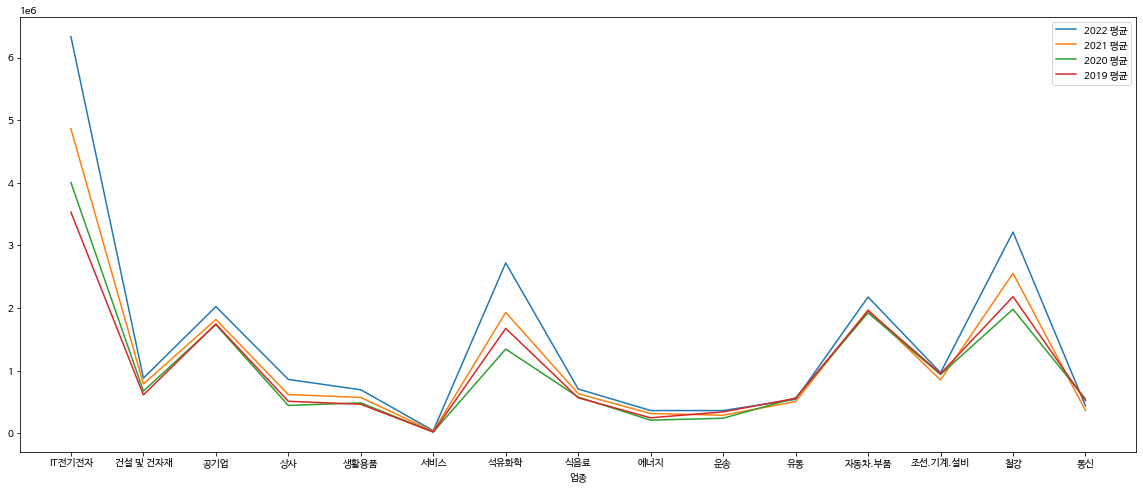

In [99]:
plt.rcParams['figure.figsize'] = [20, 8]
sns.lineplot(data = ppp2,  dashes = False);

In [72]:
re3 = re2[['회사명','업종']]

In [73]:
re4 = re2[['회사명','업종']]

In [74]:
#2022년 재무재표와 현금흐름표가 아직 전부 공시되지 않아서 1분기를 기준으로 표를 작성함

re3['2022년 재고자산비율(1분기 기준)'] = re2['2022 3월 재고자산']/re2['2022 3월 자산']
re3['2021년 재고자산비율(1분기 기준)'] = re2['2021 3월 재고자산']/re2['2021 3월 자산']
re3['2020년 재고자산비율(1분기 기준)'] = re2['2020 3월 재고자산']/re2['2020 3월 자산']
re3['2019년 재고자산비율(1분기 기준)'] = re2['2019 3월 재고자산']/re2['2019 3월 자산']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [75]:
re4['2022년 회전율(1분기 기준)'] = re2['2022 3월 매출']/re2['2022 3월 재고자산']
re4['2021년 회전율(1분기 기준)'] = re2['2021 3월 매출']/re2['2021 3월 재고자산']
re4['2020년 회전율(1분기 기준)'] = re2['2020 3월 매출']/re2['2020 3월 재고자산']
re4['2019년 회전율(1분기 기준)'] = re2['2019 3월 매출']/re2['2019 3월 재고자산']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [76]:
re3

,회사명,업종,2022년 재고자산비율(1분기 기준),2021년 재고자산비율(1분기 기준),2020년 재고자산비율(1분기 기준),2019년 재고자산비율(1분기 기준)
2,삼성전자,IT전기전자,0.108326,0.077948,0.079604,0.091159
3,현대자동차,자동차.부품,0.051873,0.05672,0.055235,0.061954
4,POSCO홀딩스,철강,0.163025,0.123799,0.130385,0.141201
5,LG전자,IT전기전자,0.185543,0.158465,0.124567,0.133699
6,기아,자동차.부품,0.113671,0.122823,0.147666,0.158434
...,...,...,...,...,...,...
287,현대케피코,자동차.부품,0.153826,0.124371,0.152511,0.131772
290,DL건설,건설 및 건자재,0.024027,0.026832,0.00103,0.000951
293,대한전선,IT전기전자,0.677112,0.598196,0.721612,0.642837
294,포스코케미칼,석유화학,0.7238,0.480232,0.482701,0.33494


In [77]:
re4

,회사명,업종,2022년 회전율(1분기 기준),2021년 회전율(1분기 기준),2020년 회전율(1분기 기준),2019년 회전율(1분기 기준)
2,삼성전자,IT전기전자,1.634383,2.135485,1.944311,1.66536
3,현대자동차,자동차.부품,2.464449,2.234168,2.120709,2.119592
4,POSCO홀딩스,철강,1.327112,1.567169,1.356184,1.422303
5,LG전자,IT전기전자,2.066844,2.352382,2.343152,2.428503
6,기아,자동차.부품,2.368156,2.110486,1.771482,1.478652
...,...,...,...,...,...,...
287,현대케피코,자동차.부품,1.516972,1.997282,1.606106,2.10799
290,DL건설,건설 및 건자재,8.813736,9.85155,412.332039,365.491607
293,대한전선,IT전기전자,4.446265,4.881114,4.678641,5.32325
294,포스코케미칼,석유화학,8.253693,15.367777,8.981583,8.581777


In [78]:
re3.groupby(re3['업종']).mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,2022년 재고자산비율(1분기 기준),2021년 재고자산비율(1분기 기준),2020년 재고자산비율(1분기 기준),2019년 재고자산비율(1분기 기준)
업종,,,,
IT전기전자,0.238235,0.196590,0.197750,0.201139
건설 및 건자재,0.096249,0.095105,0.077304,0.069944
공기업,0.040107,0.033684,0.040354,0.046747
상사,0.119637,0.087118,0.086763,0.107762
생활용품,0.173651,0.144022,0.152237,0.141187
서비스,0.004043,0.002297,0.002241,0.001799
석유화학,0.247529,0.176565,0.191501,0.207407
식음료,0.231090,0.216553,0.210941,0.210515
에너지,0.073478,0.056064,0.046589,0.055698


In [79]:
re4.groupby(re4['업종']).mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,2022년 회전율(1분기 기준),2021년 회전율(1분기 기준),2020년 회전율(1분기 기준),2019년 회전율(1분기 기준)
업종,,,,
IT전기전자,2.406508,3.043853,2.843891,2.887555
건설 및 건자재,2.970013,4.291956,31.152220,28.371709
공기업,23.234261,29.596761,19.486758,20.763675
상사,4.336777,6.636852,5.758915,5.503044
생활용품,3.436795,4.413195,4.746230,5.236123
서비스,95.691932,139.588163,121.077485,161.095532
석유화학,2.640286,3.596579,3.154719,3.157221
식음료,5.627322,5.961024,5.959351,6.211982
에너지,38.426797,18.050692,16.416967,26.397750


In [80]:
재고자산비율 = re3.groupby(re3['업종']).mean().sort_values(by= '2022년 재고자산비율(1분기 기준)', ascending=False)
회전율 = re4.groupby(re3['업종']).mean().sort_values(by= '2022년 회전율(1분기 기준)', ascending=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (13.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [81]:
plt.rc('font', family='NanumBarunGothic') 

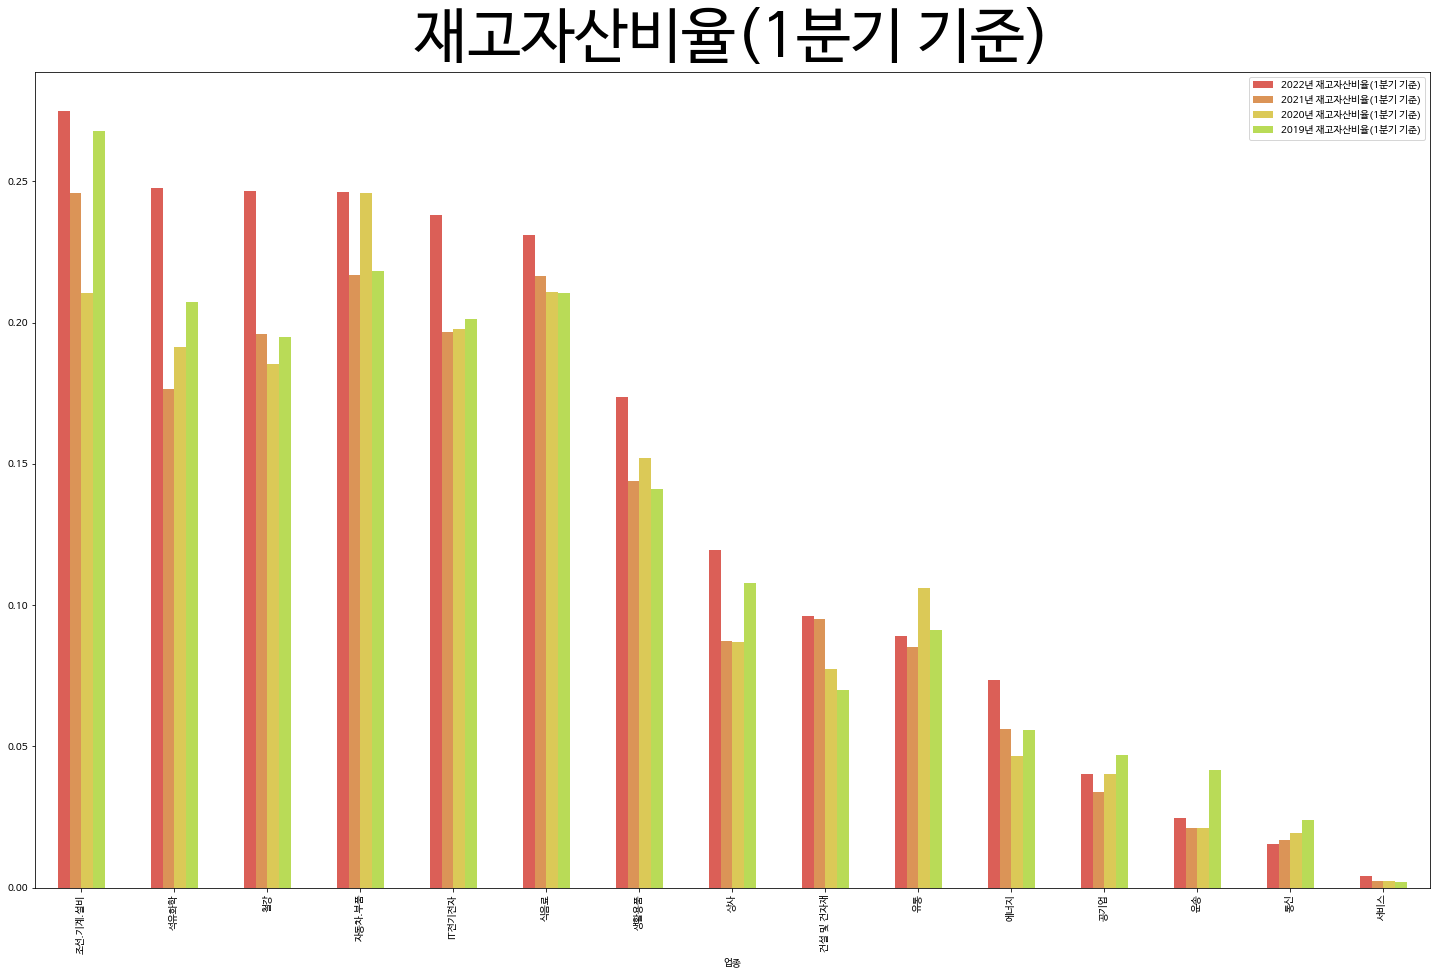

In [85]:
color = sns.color_palette('hls',len(재고자산비율))
재고자산비율.plot(kind='bar',color=color, figsize=(25, 15))
plt.title('재고자산비율(1분기 기준)', size=60)
plt.show()

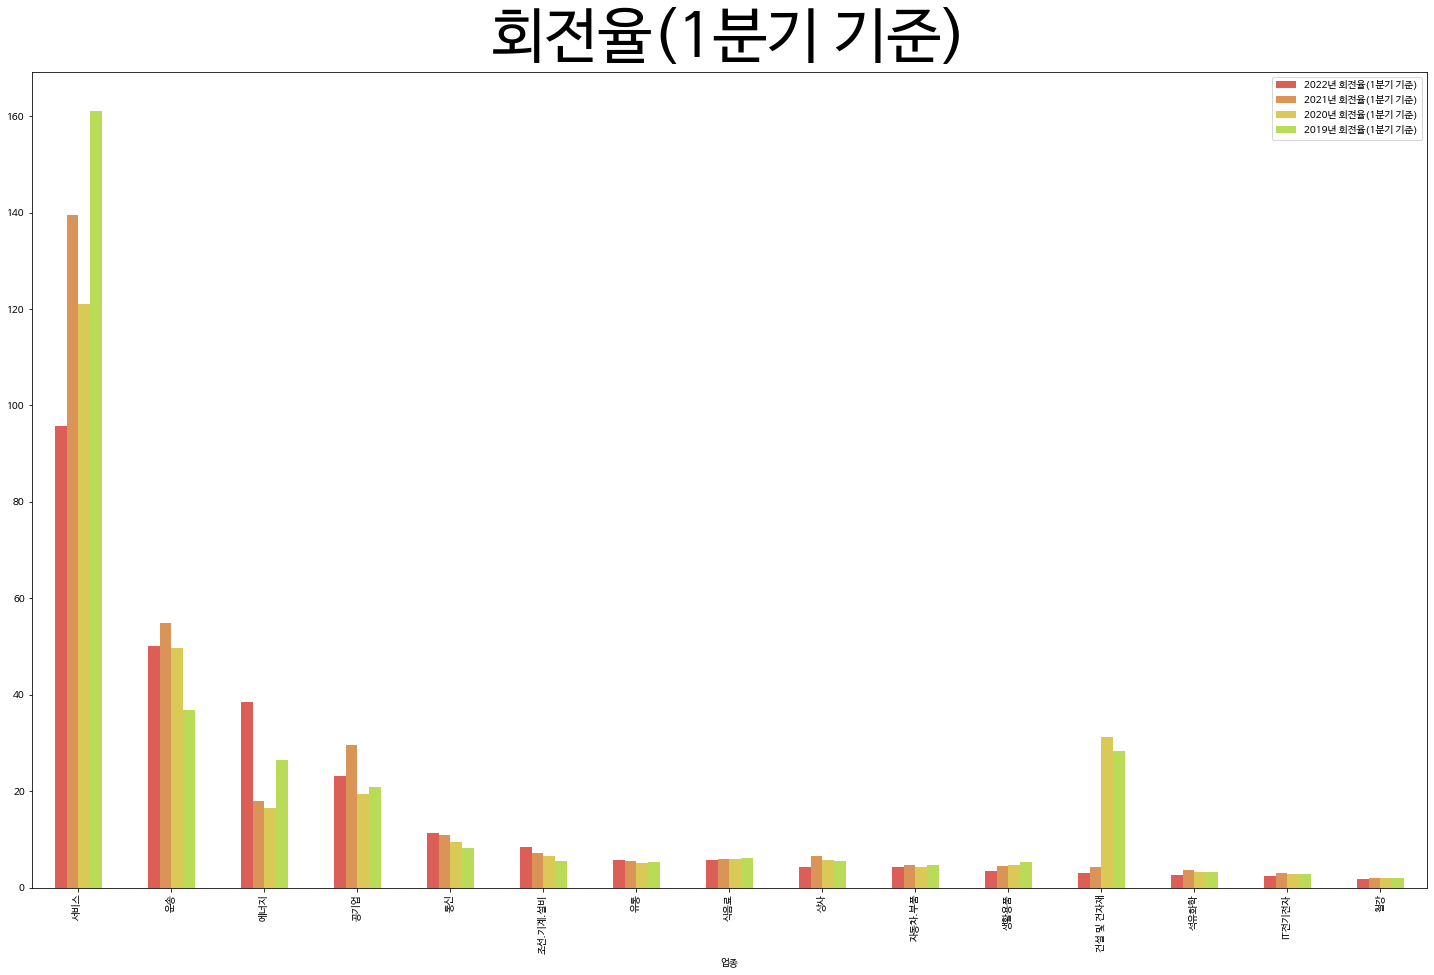

In [84]:
color = sns.color_palette('hls',len(회전율))
회전율.plot(kind='bar',color=color, figsize=(25, 15))
plt.title('회전율(1분기 기준)', size=60)
plt.show()